# Basic introduction to currency type

by: __Rodrigo Hernández Mota__

This short introduction aims to show a simple application for currency type for forex financial analysis. 

In [1]:
%matplotlib inline

from forex_data import *

import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np


## General Use

The type _currency_ was designed to facilitate the use, manipualtion and analysis of the financia data in the Forex Market. 

To declare a variable as type currency, just use **currency()** function in forex_data.py 

The main elements are:
* base: The base currency for the analysis 
* units: The value of the base currency in other units
* t0: initial day (format as yyyy/mm/dd) of the empirical data.
* tf: final day (format as yyyy/mm/dd) of the empirical data.

In [2]:
# Initialize currency
a = currency(units='MXN', base = 'USD', t0 = '2014/01/01', tf = '2016/10/01')

Now, the variable **a** is type currency. 

In [3]:
type(a)

forex_data.currency

In [4]:
a.desc

'Foreign Exchange Rate'

In [90]:
strval = [a.base, a.units, a.t0.strftime('%Y-%m-%d'), a.tf.strftime('%Y-%m-%d')]
strg = 'The variable a contains information about the a base currency ({}) expressed in {} units, \nfrom initial time: {} to: {}'

print(strg.format(*strval))

The variable a contains information about the a base currency (USD) expressed in MXN units, 
from initial time: 2014-01-01 to: 2016-10-01


### Prices and returns 

To fill the variable with the financial data (prices) use the **.download()** function. To calculate the returns, use **.calc_returns()**. 

The prices are downloaded from Yahoo!'s database. If you want to save the data into a .csv (to increase read speed), manually create a in your directory a folder named 'general_database' and save the downloaded data by using: **.download(save = True)** The default is _save = False_.

The default configuration to calculate the returns is logarithmic, assuming: $ S_t = S_{t-1} e^r_t$
Where $r$ is the interest rate or return. Therefore $r_t = \log{(S_t / S_{t-1})}$

To use compund interest rate conventional formuta use: **.calc_returns(met_log = False)**.
In this case: $ S_t = S_{t-1} (1 + r_t)$.
And therefore: $r_t = \frac{S_t}{S_{t-1}} - 1$

In [3]:
# Download prices and calculate returns
# alternative: a.fill()

a.download()
a.calc_returns()

,Open,High,Low,Close,Adj_close
Date,,,,,
2014-01-01,13.0273,13.0273,13.0273,13.0273,13.0273
2014-01-02,13.0262,13.1542,13.0137,13.0237,13.0237
2014-01-03,13.1499,13.1558,13.0495,13.1485,13.1485
2014-01-06,13.0890,13.1396,13.0644,13.0937,13.0937
2014-01-07,13.0691,13.1100,12.9983,13.0687,13.0687


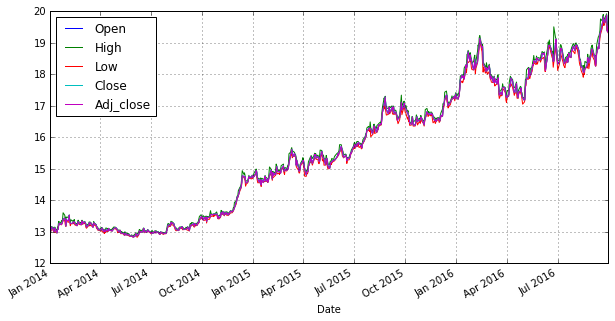

In [93]:
# Show prices 
a.prices.plot(grid = True, figsize=(10,5))
a.prices.head()

,Open,High,Low,Close,Adj_close
Date,,,,,
2014-01-02,-0.000084,0.009694,-0.001045,-0.000276,-0.000276
2014-01-03,0.009451,0.000122,0.002747,0.009537,0.009537
2014-01-06,-0.004642,-0.001232,0.001141,-0.004176,-0.004176
2014-01-07,-0.001522,-0.002255,-0.005072,-0.001911,-0.001911
2014-01-08,-0.005194,-0.002253,-0.001494,-0.005163,-0.005163


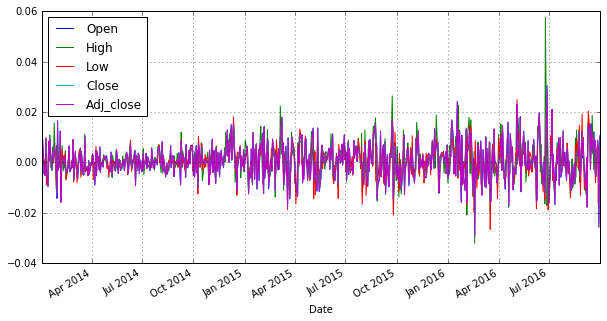

In [94]:
# Show returns

a.returns.plot(grid = True, figsize=(10,5))
a.returns.head()

count    716.000000
mean       0.000567
std        0.006817
min       -0.029294
25%       -0.003180
50%        0.000324
75%        0.004626
max        0.028725
Name: Adj_close, dtype: float64


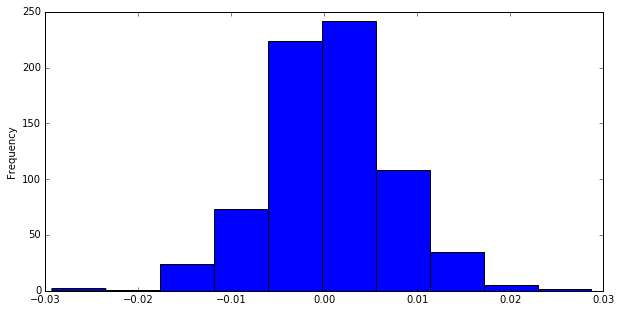

In [95]:
# Show histogram of returns
print(a.returns.Adj_close.describe())
a.returns.Adj_close.plot(kind = 'hist', figsize=(10,5))

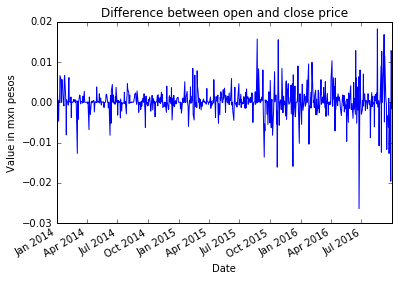

In [96]:
# Difference among the open price and the close price. 

plt.figure()
(a.prices.Open - a.prices.Close).plot()
plt.title('Difference between open and close price')
plt.ylabel('Value in mxn pesos')
plt.show()

As it can be seen, by using type currency the data is stored in memory as a Pandas DataFrame; therefore all the benefits of this datatype are included. 

### Monte Carlo Simulations

This datatype allows the user to perform Monte Carlo simulations.

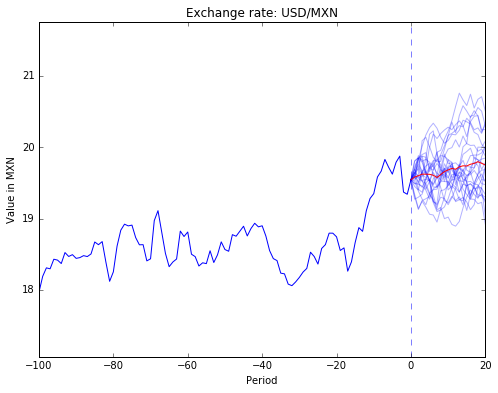

The expected value of the exchange rate in 20 periods is: 19.752597116221217


19.752597116221217

In [5]:
a.montecarlo_simul()

Change the periods and number of trayectories:

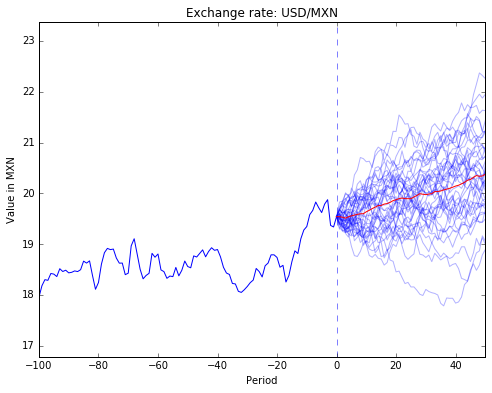

The expected value of the exchange rate in 50 periods is: 20.37744350983801


20.37744350983801

In [10]:
a.montecarlo_simul(periods = 50, tr_y = 40)

Conventionally, this simulation assumes a normal distribution. Use the non parametric distribution of the returns by activating: non_parametric = True

In [ ]:
# work in progress
# a.montecarlo_simul(non_parametric = True)

### Self-information and entropy 

The **self-information** of an event, say $x_i$, is determinend by its probability of occurance $P(x_i)$. The realization of an event whose probability is 1 represents no new information at all (because it was prevoiusly expected or known a priori). Otherwise, a highly improbable outcoume must contain a significant amount of information (or surprise). 

Therefore, the measeure of the amount of information of the event $x_i$ must be a function $I$ such that:
$$ I(x_i) = f(P(x_i))$$

Where $f = 0$ when $P(x_n) = 1$ and  $f > 0$ when $P(x_n) < 1$. 


To acheive this property (and [others](https://en.wikipedia.org/wiki/Self-information)) the log() function is used as following: 

$$ I(x_i) = -\log{ P(x_i)} $$

The expected value of the self-information of a random event is called **information-entropy**. This measure represents the degree of unpredictability of the variable. 

Say that the event $x_i$ is a realization of a discreate random variable denoted by $X$ with space ${x_1, x_2, ..., x_n}$ and probability mass $P(X)$ for each $x_i$. Then the information-entropy **H** is:

$$ H(X) = \sum_{i = 1}^n P(x_i) I(x_i) = \sum_{i = 1}^n P(x_i) \log{ \frac{1}{P(x_i)}} $$

EXAMPLE: 

A random variable $N$ that can take the value of ${n_1, n_2}$ with probability $P(n_1) = p$ and $P(n_2) = 1 - p$.

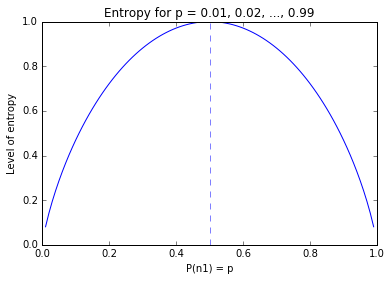

In [77]:
step = 0.01
p = np.arange(step,1,step)
entropy = lambda x: x*np.log2(1/x)
H = list(map(lambda x: entropy(x) + entropy(1-x), p))

plt.figure()
plt.plot(p, H)
plt.axvline(x=0.5, alpha = 0.5, ls = '--')
plt.title('Entropy for p = {}, {}, ..., {}'.format(step,2*step, 1-step))
plt.xlabel('P(n1) = p')
plt.ylabel('Level of entropy')
plt.show()

As it can be seen, the maximum level of entropy or unpredictibility for a binary random variable it's when the probability is uniform (p = 0.5 and 1 - p = 0.5).

Type Currency allows to perform a basic entropy calculation on the returns as a binary variable (i.e. the values > 0 are 1 and anything else is 0).


In [97]:
a.entropy()

0.99751648714535968

The previous entropy was calculated with all the data available in a.returns.Adj_close. We can arbitrarly change this by defining init_t as a string indicating the initial day and delta as an int that represent the number of days to take into account after init_t. By default, init_t is the first date and delta is the maximum number of dates it can take. 



In [98]:
a.entropy(init_t = '2015/06/01', delta = 32)

0.94268318925549222

There is also a method to find the optimum delta that generates the minimum average entropy in the series of the empiral data. 

In [12]:
# work in progress
#a.mindelt_entropy()

The minimun average entropy is produced by a delta of 14 in this case. In general, the minimun entropy will be the minimun delta required (14 is the default). 

In [106]:
a.entropy(delta = 14)

0.99403021147695658

### Binary Transformations

[not quite accurate]

For the entropy we "transformed" the retruns of series into a binary variable; 1 when $r > 0$ and 0 when $r \leq 0$. Therefore, the information is regarded as: '0100111101000100111'. This is a first level binary transformation. 

A second level transformation takes the possible outputs of the combination of the symbols '0' and '1' and rewrites then with another symbol;
* 00 - q
* 01 - w
* 10 - e
* 11 - r

A third level transformation performs this operation on the second level. 
* qwer - q
* qwre - w
* qewr - e
* qerw - r
* qrwe - t
* qrew - y

* wqer - y
* wqre - u
* weqr - i
* werq - o
* wrqe - p
* wreq - a

* eqwr - s
* eqrw - d
* ewqr - f
* ewrq - g
* erwq - h
* erqw - j

* rqwe - k
* rqew - l
* rweq - z
* rwqe - x
* rewq - c
* reqw - v


In [7]:
b = '0100111101000100111'
list(set(b))

['1', '0']

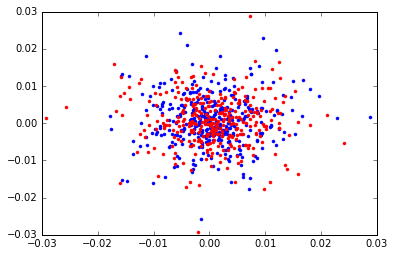

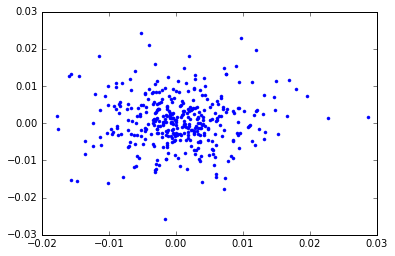

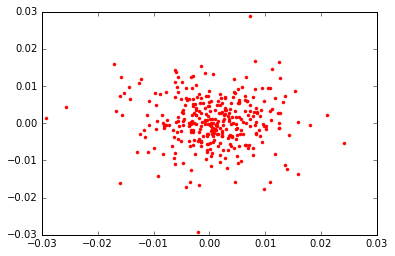

In [103]:
# general mask, index of returns > 0
g_mask = a.binary_rend()[2:]
av_ind = np.arange(2,len(a.returns.Adj_close))
indz = av_ind[g_mask]

g_maskn = (a.binary_rend() == False)[2:]
av_indn = np.arange(2,len(a.returns.Adj_close))
indzn = av_ind[g_maskn]


# index...
id1 = (indz - 1)
id2 = (indz - 2)

id1n = (indzn - 1)
id2n = (indzn - 2)

# one step before
r1t = a.returns.Adj_close.iloc[id1]
r1f = a.returns.Adj_close.iloc[id1n]

# two steps before
r2t = a.returns.Adj_close.iloc[id2]
r2f = a.returns.Adj_close.iloc[id2n]

plt.figure()
plt.plot(r1t,r2t,'.b', r1f,r2f,'.r')
plt.show()

plt.figure()
plt.plot(r1t,r2t,'.b')
plt.show()

plt.figure()
plt.plot(r1f,r2f,'.r')
plt.show()


In [104]:
a.binary_rend()

array([False,  True, False, False, False,  True, False, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False, False,  True, False,  True,  True, False, False, False,
        True,  True, False,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True, False, False,
       False, False,  True,  True,  True, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False,  True,  True, False, False,  True, False,  True,
        True, False,  True, False, False,  True, False,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True,  True, False, False,  True, False, False,
        True,  True, False, False,  True, False,  True, False,  True,
        True,  True, False, False,  True,  True, False, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
        True, False,

In [117]:
a.returns.Adj_close.mean()

0.0005665314640691066

In [214]:
np.min([np.min(a.prices.Adj_close.values[-100:]), np.min(m)]) - 1 

17.055999999999997

In [241]:
mean_value[-1]

20.02414582416759